## Webscraping - OpenSecrets

# An Analysis of Political Contributions During the 2020 House of Representatives Election

In this part, you will obtain as much data as you can on the campaign contributions received by each candidate. This data is avaiable through the website https://www.opensecrets.org/.

### Part 1: Data Gathering
1. Start by scraping the data from the summary page for Tennessee's 7th District, which is available at https://www.opensecrets.org/races/candidates?cycle=2020&id=TN07&spec=N.

In [1]:
import requests
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime as dt
import urllib3
# import re2
import regex
import re




In [2]:
state_abbr = [
  'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL','GA',
  'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME','MD',
  'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH' ,'NJ',
  'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
  'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
 ]

In [3]:
def getLinks(URL2):
    html_page2 = requests.get(URL2)
    soup = BeautifulSoup(html_page2.text)
    links2 = []

    for link in soup.findAll('a', attrs={'href': re.compile(r'\/races\/summary\?cycle=2020&id=\w{2}\d{2}&spec=N')}):
        links2.append(link.get('href'))

    return links2

In [4]:
state_list = []
district_list = []

for state in state_abbr:
     URL_State = f'https://www.opensecrets.org/races/election?cycle=2020&id={state}'
      
     # state_list.append(URL_State)
 

     # for URL2 in state_list:
     links2 = getLinks(URL_State)
     district_list.extend(links2)
     


In [5]:
print(district_list)

['/races/summary?cycle=2020&id=AL01&spec=N', '/races/summary?cycle=2020&id=AL02&spec=N', '/races/summary?cycle=2020&id=AL03&spec=N', '/races/summary?cycle=2020&id=AL04&spec=N', '/races/summary?cycle=2020&id=AL05&spec=N', '/races/summary?cycle=2020&id=AL06&spec=N', '/races/summary?cycle=2020&id=AL07&spec=N', '/races/summary?cycle=2020&id=AK01&spec=N', '/races/summary?cycle=2020&id=AZ01&spec=N', '/races/summary?cycle=2020&id=AZ02&spec=N', '/races/summary?cycle=2020&id=AZ03&spec=N', '/races/summary?cycle=2020&id=AZ04&spec=N', '/races/summary?cycle=2020&id=AZ05&spec=N', '/races/summary?cycle=2020&id=AZ06&spec=N', '/races/summary?cycle=2020&id=AZ07&spec=N', '/races/summary?cycle=2020&id=AZ08&spec=N', '/races/summary?cycle=2020&id=AZ09&spec=N', '/races/summary?cycle=2020&id=AR01&spec=N', '/races/summary?cycle=2020&id=AR02&spec=N', '/races/summary?cycle=2020&id=AR03&spec=N', '/races/summary?cycle=2020&id=AR04&spec=N', '/races/summary?cycle=2020&id=CA01&spec=N', '/races/summary?cycle=2020&id=C

In [6]:
DistrictSummaryURLs = (["https://www.opensecrets.org" + word for word in district_list])
DistrictSummaryURLs  

['https://www.opensecrets.org/races/summary?cycle=2020&id=AL01&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AL02&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AL03&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AL04&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AL05&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AL06&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AL07&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AK01&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AZ01&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AZ02&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AZ03&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AZ04&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AZ05&spec=N',
 'https://www.opensecrets.org/races/summary?cycle=2020&id=AZ06&s

In [7]:
candidates_page_Series3 = pd.Series(DistrictSummaryURLs).str.replace('summary','candidates')
candidates_page_Series3

candidates_page_List3 = pd.Series(DistrictSummaryURLs).str.replace('summary','candidates').to_list()
candidates_page_List3

['https://www.opensecrets.org/races/candidates?cycle=2020&id=AL01&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AL02&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AL03&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AL04&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AL05&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AL06&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AL07&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AK01&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AZ01&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AZ02&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AZ03&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AZ04&spec=N',
 'https://www.opensecrets.org/races/candidates?cycle=2020&id=AZ05&spec=N',
 'https://www.opensecrets

In [8]:
US_Districts_Summary_Running_Info = []
US_Districts_Candidate_Running_Info = []

for URL_feed in DistrictSummaryURLs:
    response = requests.get(URL_feed)
    soup = BeautifulSoup(response.text)
    Cash_df = pd.read_html(str(soup.find('table', attrs={'class' : 'DataTable'})))[0]
    Cash_df['State_District_Title'] = soup.find('title').text    
    US_Districts_Summary_Running_Info.append(Cash_df)
 

In [9]:
for URL_feed in candidates_page_Series3:
    response = requests.get(URL_feed)
    soup = BeautifulSoup(response.text)
    # vote percentage extract, along with candidates' names and district/state title (pull title of page; to be extra safe)
  

In [10]:
US_Districts_Summary_Running_Info

[                  Candidate      Raised       Spent Cash on Hand Last Report  \
 0  Jerry Carl (R)  • Winner  $1,971,321  $1,859,349     $111,973  12/31/2020   
 1        James Averhart (D)     $80,095     $78,973       $1,122  12/31/2020   
 
                           State_District_Title  
 0  Alabama District 01 2020 Race • OpenSecrets  
 1  Alabama District 01 2020 Race • OpenSecrets  ,
                    Candidate    Raised     Spent Cash on Hand Last Report  \
 0  Barry Moore (R)  • Winner  $650,807  $669,368     -$13,633  12/31/2020   
 1    Phyllis Harvey-Hall (D)   $56,050   $55,988           $0  12/31/2020   
 
                           State_District_Title  
 0  Alabama District 02 2020 Race • OpenSecrets  
 1  Alabama District 02 2020 Race • OpenSecrets  ,
                                  Candidate      Raised       Spent  \
 0  Mike D Rogers (R)  • Incumbent • Winner  $1,193,111  $1,218,564   
 1                         Adia Winfrey (D)     $50,273     $40,971   
 
  

In [11]:
# US_Districts_Candidate_Running_Info

In [127]:
Grand_Table_US_Districts_Summary_Running_Info = pd.concat(US_Districts_Summary_Running_Info, ignore_index=True)
Grand_Table_US_Districts_Summary_Running_Info

,Candidate,Raised,Spent,Cash on Hand,Last Report,State_District_Title
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama District 01 2020 Race • OpenSecrets
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama District 01 2020 Race • OpenSecrets
2,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama District 02 2020 Race • OpenSecrets
3,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,Alabama District 02 2020 Race • OpenSecrets
4,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,Alabama District 03 2020 Race • OpenSecrets
...,...,...,...,...,...,...
840,Tricia Zunker (D),"$1,261,957","$1,232,690","$29,267",12/31/2020,Wisconsin District 07 2020 Race • OpenSecrets
841,Mike Gallagher (R) • Incumbent • Winner,"$3,202,905","$2,841,801","$1,169,362",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets
842,Amanda Stuck (D),"$416,978","$399,916","$2,165",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets
843,Liz Cheney (R) • Incumbent • Winner,"$3,003,883","$3,060,167","$153,567",12/31/2020,Wyoming District 01 2020 Race • OpenSecrets


In [128]:
Grand_Table_US_Districts_Summary_Running_Info['Candidate'].str.contains('Incumbent') 
# Grand_Table_US_Districts_Summary_Running_Info

0      False
1      False
2      False
3      False
4       True
       ...  
840    False
841     True
842    False
843     True
844    False
Name: Candidate, Length: 845, dtype: bool

In [129]:
Grand_Table_US_Districts_Summary_Running_Info['Incumbent'] = Grand_Table_US_Districts_Summary_Running_Info['Candidate'].str.contains('Incumbent').astype(int)

In [130]:
Grand_Table_US_Districts_Summary_Running_Info

,Candidate,Raised,Spent,Cash on Hand,Last Report,State_District_Title,Incumbent
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0
2,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0
3,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0
4,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,Alabama District 03 2020 Race • OpenSecrets,1
...,...,...,...,...,...,...,...
840,Tricia Zunker (D),"$1,261,957","$1,232,690","$29,267",12/31/2020,Wisconsin District 07 2020 Race • OpenSecrets,0
841,Mike Gallagher (R) • Incumbent • Winner,"$3,202,905","$2,841,801","$1,169,362",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,1
842,Amanda Stuck (D),"$416,978","$399,916","$2,165",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,0
843,Liz Cheney (R) • Incumbent • Winner,"$3,003,883","$3,060,167","$153,567",12/31/2020,Wyoming District 01 2020 Race • OpenSecrets,1


In [131]:
Grand_Table_US_Districts_Summary_Running_Info['Candidate'].str.contains('Winner') 
# Grand_Table_US_Districts_Summary_Running_Info

0       True
1      False
2       True
3      False
4       True
       ...  
840    False
841     True
842    False
843     True
844    False
Name: Candidate, Length: 845, dtype: bool

In [132]:
Grand_Table_US_Districts_Summary_Running_Info['Won'] = Grand_Table_US_Districts_Summary_Running_Info['Candidate'].str.contains('Winner').astype(int)
Grand_Table_US_Districts_Summary_Running_Info

,Candidate,Raised,Spent,Cash on Hand,Last Report,State_District_Title,Incumbent,Won
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0,1
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0,0
2,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0,1
3,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0,0
4,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,Alabama District 03 2020 Race • OpenSecrets,1,1
...,...,...,...,...,...,...,...,...
840,Tricia Zunker (D),"$1,261,957","$1,232,690","$29,267",12/31/2020,Wisconsin District 07 2020 Race • OpenSecrets,0,0
841,Mike Gallagher (R) • Incumbent • Winner,"$3,202,905","$2,841,801","$1,169,362",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,1,1
842,Amanda Stuck (D),"$416,978","$399,916","$2,165",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,0,0
843,Liz Cheney (R) • Incumbent • Winner,"$3,003,883","$3,060,167","$153,567",12/31/2020,Wyoming District 01 2020 Race • OpenSecrets,1,1


In [134]:
Grand_Table_US_Districts_Summary_Running_Info[['Candidate_Name', 'extra_str3']] = Grand_Table_US_Districts_Summary_Running_Info.Candidate.str.split(" • ", n=1, expand=True) 
Grand_Table_US_Districts_Summary_Running_Info

,Candidate,Raised,Spent,Cash on Hand,Last Report,State_District_Title,Incumbent,Won,Candidate_Name,extra_str3
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0,1,Jerry Carl (R),Winner
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0,0,James Averhart (D),None
2,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0,1,Barry Moore (R),Winner
3,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0,0,Phyllis Harvey-Hall (D),None
4,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,Alabama District 03 2020 Race • OpenSecrets,1,1,Mike D Rogers (R),Incumbent • Winner
...,...,...,...,...,...,...,...,...,...,...
840,Tricia Zunker (D),"$1,261,957","$1,232,690","$29,267",12/31/2020,Wisconsin District 07 2020 Race • OpenSecrets,0,0,Tricia Zunker (D),None
841,Mike Gallagher (R) • Incumbent • Winner,"$3,202,905","$2,841,801","$1,169,362",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,1,1,Mike Gallagher (R),Incumbent • Winner
842,Amanda Stuck (D),"$416,978","$399,916","$2,165",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,0,0,Amanda Stuck (D),None
843,Liz Cheney (R) • Incumbent • Winner,"$3,003,883","$3,060,167","$153,567",12/31/2020,Wyoming District 01 2020 Race • OpenSecrets,1,1,Liz Cheney (R),Incumbent • Winner


In [135]:
# Grand_Table_US_Districts_Summary_Running_Info['Won'].stype(string).str.contains('Incumbent') 
# Grand_Table_US_Districts_Summary_Running_Info

AttributeError: 'Series' object has no attribute 'stype'

In [137]:
Grand_Table_US_Districts_Summary_Running_Info[['State_and_District', 'extra_str']] = Grand_Table_US_Districts_Summary_Running_Info.State_District_Title.str.split(" • ", n=1, expand=True) 
Grand_Table_US_Districts_Summary_Running_Info

,Candidate,Raised,Spent,Cash on Hand,Last Report,State_District_Title,Incumbent,Won,Candidate_Name,extra_str3,State_and_District,extra_str
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0,1,Jerry Carl (R),Winner,Alabama District 01 2020 Race,OpenSecrets
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0,0,James Averhart (D),None,Alabama District 01 2020 Race,OpenSecrets
2,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0,1,Barry Moore (R),Winner,Alabama District 02 2020 Race,OpenSecrets
3,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0,0,Phyllis Harvey-Hall (D),None,Alabama District 02 2020 Race,OpenSecrets
4,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,Alabama District 03 2020 Race • OpenSecrets,1,1,Mike D Rogers (R),Incumbent • Winner,Alabama District 03 2020 Race,OpenSecrets
...,...,...,...,...,...,...,...,...,...,...,...,...
840,Tricia Zunker (D),"$1,261,957","$1,232,690","$29,267",12/31/2020,Wisconsin District 07 2020 Race • OpenSecrets,0,0,Tricia Zunker (D),None,Wisconsin District 07 2020 Race,OpenSecrets
841,Mike Gallagher (R) • Incumbent • Winner,"$3,202,905","$2,841,801","$1,169,362",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,1,1,Mike Gallagher (R),Incumbent • Winner,Wisconsin District 08 2020 Race,OpenSecrets
842,Amanda Stuck (D),"$416,978","$399,916","$2,165",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,0,0,Amanda Stuck (D),None,Wisconsin District 08 2020 Race,OpenSecrets
843,Liz Cheney (R) • Incumbent • Winner,"$3,003,883","$3,060,167","$153,567",12/31/2020,Wyoming District 01 2020 Race • OpenSecrets,1,1,Liz Cheney (R),Incumbent • Winner,Wyoming District 01 2020 Race,OpenSecrets


In [138]:
Grand_Table_US_Districts_Summary_Running_Info[['State & District', 'extra_str2']] = Grand_Table_US_Districts_Summary_Running_Info.State_and_District.str.split(" 2020 Race", n=1, expand=True) 
Grand_Table_US_Districts_Summary_Running_Info

,Candidate,Raised,Spent,Cash on Hand,Last Report,State_District_Title,Incumbent,Won,Candidate_Name,extra_str3,State_and_District,extra_str,State & District,extra_str2
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0,1,Jerry Carl (R),Winner,Alabama District 01 2020 Race,OpenSecrets,Alabama District 01,
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama District 01 2020 Race • OpenSecrets,0,0,James Averhart (D),None,Alabama District 01 2020 Race,OpenSecrets,Alabama District 01,
2,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0,1,Barry Moore (R),Winner,Alabama District 02 2020 Race,OpenSecrets,Alabama District 02,
3,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,Alabama District 02 2020 Race • OpenSecrets,0,0,Phyllis Harvey-Hall (D),None,Alabama District 02 2020 Race,OpenSecrets,Alabama District 02,
4,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,Alabama District 03 2020 Race • OpenSecrets,1,1,Mike D Rogers (R),Incumbent • Winner,Alabama District 03 2020 Race,OpenSecrets,Alabama District 03,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,Tricia Zunker (D),"$1,261,957","$1,232,690","$29,267",12/31/2020,Wisconsin District 07 2020 Race • OpenSecrets,0,0,Tricia Zunker (D),None,Wisconsin District 07 2020 Race,OpenSecrets,Wisconsin District 07,
841,Mike Gallagher (R) • Incumbent • Winner,"$3,202,905","$2,841,801","$1,169,362",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,1,1,Mike Gallagher (R),Incumbent • Winner,Wisconsin District 08 2020 Race,OpenSecrets,Wisconsin District 08,
842,Amanda Stuck (D),"$416,978","$399,916","$2,165",12/31/2020,Wisconsin District 08 2020 Race • OpenSecrets,0,0,Amanda Stuck (D),None,Wisconsin District 08 2020 Race,OpenSecrets,Wisconsin District 08,
843,Liz Cheney (R) • Incumbent • Winner,"$3,003,883","$3,060,167","$153,567",12/31/2020,Wyoming District 01 2020 Race • OpenSecrets,1,1,Liz Cheney (R),Incumbent • Winner,Wyoming District 01 2020 Race,OpenSecrets,Wyoming District 01,


    * Make a DataFrame showing, for each candidate:
        * the candidate's name
        * the candidate's party
        * >> state
        * district number
        * whether the candidate was an incumbent
        * >> whether the candidate won the race
        * the percentage of the vote that candidate received
        * the total amount raised by that candidate (as a numeric variable)
        * >> the total amount spent by the candidate (as a numeric variable)

In [139]:
Grand_Table_US_Districts_Summary_Running_Info.drop(['Candidate', 'Last Report', 'State_District_Title', 'State_and_District', 'extra_str', 'extra_str2', 'extra_str3'], axis=1, inplace=True)
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District
0,"$1,971,321","$1,859,349","$111,973",0,1,Jerry Carl (R),Alabama District 01
1,"$80,095","$78,973","$1,122",0,0,James Averhart (D),Alabama District 01
2,"$650,807","$669,368","-$13,633",0,1,Barry Moore (R),Alabama District 02
3,"$56,050","$55,988",$0,0,0,Phyllis Harvey-Hall (D),Alabama District 02
4,"$1,193,111","$1,218,564","$502,234",1,1,Mike D Rogers (R),Alabama District 03
...,...,...,...,...,...,...,...
840,"$1,261,957","$1,232,690","$29,267",0,0,Tricia Zunker (D),Wisconsin District 07
841,"$3,202,905","$2,841,801","$1,169,362",1,1,Mike Gallagher (R),Wisconsin District 08
842,"$416,978","$399,916","$2,165",0,0,Amanda Stuck (D),Wisconsin District 08
843,"$3,003,883","$3,060,167","$153,567",1,1,Liz Cheney (R),Wyoming District 01


In [146]:
# remove $ from elements 
Grand_Table_US_Districts_Summary_Running_Info['Spent'] = Grand_Table_US_Districts_Summary_Running_Info['Spent'].str.replace('$','').str.replace(',', '')
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03
...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01


In [147]:
Grand_Table_US_Districts_Summary_Running_Info['Raised'] = Grand_Table_US_Districts_Summary_Running_Info['Raised'].str.replace('$','').str.replace(',', '')
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03
...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01


In [148]:
Grand_Table_US_Districts_Summary_Running_Info['Cash on Hand'] = Grand_Table_US_Districts_Summary_Running_Info['Cash on Hand'].str.replace('$','').str.replace(',', '')
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03
...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01


In [144]:
# Grand_Table_US_Districts_Summary_Running_Info = Grand_Table_US_Districts_Summary_Running_Info.fillna(0)
# Grand_Table_US_Districts_Summary_Running_Info

In [149]:
Grand_Table_US_Districts_Summary_Running_Info['Spent'] = pd.to_numeric(Grand_Table_US_Districts_Summary_Running_Info['Spent'])
Grand_Table_US_Districts_Summary_Running_Info['Raised'] = pd.to_numeric(Grand_Table_US_Districts_Summary_Running_Info['Raised'])
Grand_Table_US_Districts_Summary_Running_Info['Cash on Hand'] = pd.to_numeric(Grand_Table_US_Districts_Summary_Running_Info['Cash on Hand'])
Grand_Table_US_Districts_Summary_Running_Info['Won'] = pd.to_numeric(Grand_Table_US_Districts_Summary_Running_Info['Won'])
Grand_Table_US_Districts_Summary_Running_Info['Incumbent'] = pd.to_numeric(Grand_Table_US_Districts_Summary_Running_Info['Incumbent'])
Grand_Table_US_Districts_Summary_Running_Info 

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03
...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01


In [27]:
# Grand_Table_US_Districts_Summary_Running_Info['Won'] = Grand_Table_US_Districts_Summary_Running_Info['Won'].str.replace('NA', '0')
# Grand_Table_US_Districts_Summary_Running_Info

In [28]:
# Grand_Table_US_Districts_Candidate_Running_Info = pd.concat(US_Districts_Candidate_Running_Info, ignore_index=True)
# Grand_Table_US_Districts_Candidate_Running_Info

In [150]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [151]:
Spent_logreg = smf.logit("Won ~ Spent",
                                data = Grand_Table_US_Districts_Summary_Running_Info).fit()

Optimization terminated successfully.
         Current function value: 0.652810
         Iterations 6


In [152]:
Spent_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Won   No. Observations:                  845
Model:                          Logit   Df Residuals:                      843
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                 0.05785
Time:                        21:09:32   Log-Likelihood:                -551.62
converged:                       True   LL-Null:                       -585.50
Covariance Type:            nonrobust   LLR p-value:                 1.863e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5192      0.094     -5.526      0.000      -0.703      -0.335
Spent       3.085e-07   4.45e-08      6.930      0.000    2.21e-07    3.96e-07
==============================================================================
"""

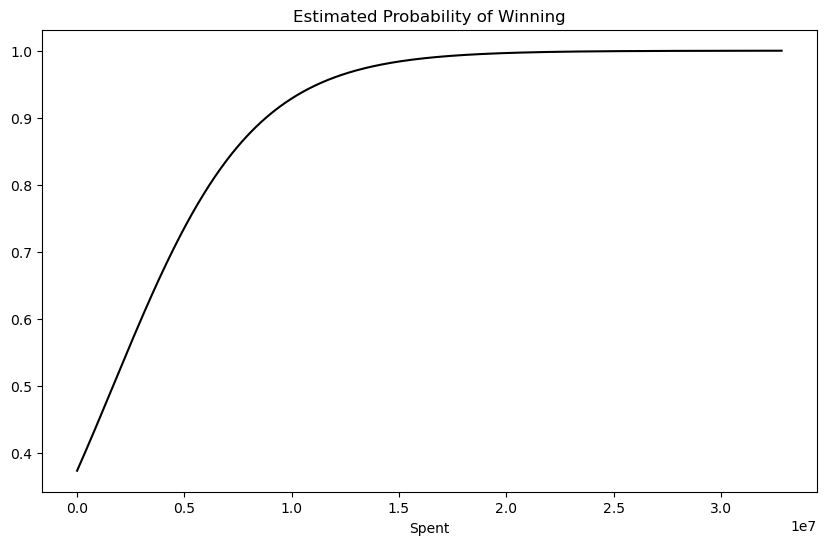

In [153]:
fit_df = pd.DataFrame({
    'Spent': np.linspace(start = Grand_Table_US_Districts_Summary_Running_Info['Spent'].min(),
                            stop = Grand_Table_US_Districts_Summary_Running_Info['Spent'].max(),
                            num = 844)
})

fit_df['fit'] = Spent_logreg.predict(fit_df)

fit_df.plot(x = 'Spent',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of Winning');

In [154]:
Spent_summary = (
    Grand_Table_US_Districts_Summary_Running_Info
    .assign(group = pd.qcut(Grand_Table_US_Districts_Summary_Running_Info['Spent'], 
                            q = 60, 
                            duplicates = 'drop'))
    .groupby('group')
    [['Won', 'Spent']]
    .mean()
    .reset_index()
    .rename(columns = {'Won': 'eprob'})
)

Spent_summary

,group,eprob,Spent
0,"(-0.001, 353.4]",0.000000,9.813333e+01
1,"(353.4, 1599.533]",0.000000,9.863571e+02
2,"(1599.533, 5056.2]",0.000000,3.138000e+03
3,"(5056.2, 8399.333]",0.000000,6.237571e+03
4,"(8399.333, 11817.0]",0.000000,1.001021e+04
5,"(11817.0, 15559.0]",0.000000,1.381193e+04
6,"(15559.0, 22631.667]",0.000000,1.962814e+04
7,"(22631.667, 28059.267]",0.000000,2.516871e+04
8,"(28059.267, 35021.8]",0.000000,3.212571e+04
9,"(35021.8, 42840.333]",0.000000,3.938957e+04


In [155]:
Spent_summary['fit_prob'] = Spent_logreg.predict(Spent_summary[['Spent']])
Spent_summary

,group,eprob,Spent,fit_prob
0,"(-0.001, 353.4]",0.000000,9.813333e+01,0.373038
1,"(353.4, 1599.533]",0.000000,9.863571e+02,0.373102
2,"(1599.533, 5056.2]",0.000000,3.138000e+03,0.373257
3,"(5056.2, 8399.333]",0.000000,6.237571e+03,0.373481
4,"(8399.333, 11817.0]",0.000000,1.001021e+04,0.373753
5,"(11817.0, 15559.0]",0.000000,1.381193e+04,0.374028
6,"(15559.0, 22631.667]",0.000000,1.962814e+04,0.374448
7,"(22631.667, 28059.267]",0.000000,2.516871e+04,0.374848
8,"(28059.267, 35021.8]",0.000000,3.212571e+04,0.375351
9,"(35021.8, 42840.333]",0.000000,3.938957e+04,0.375877


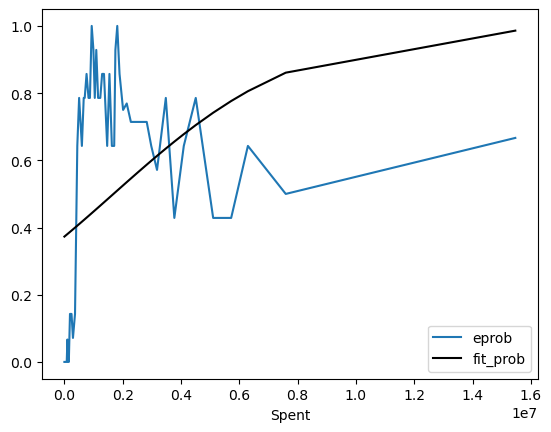

In [156]:
ax = Spent_summary.plot(x = 'Spent', y = 'eprob')
Spent_summary.plot(x = 'Spent', y = 'fit_prob',
                color = 'black',
                ax = ax);

In [157]:
Spent_summary['elogit'] = np.log(Spent_summary['eprob'] / (1 - Spent_summary['eprob']))
Spent_summary['fit_logit'] = np.log(Spent_summary['fit_prob'] / (1 - Spent_summary['fit_prob']))
Spent_summary

/Applications/Anaconda3_2023-09-0/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,group,eprob,Spent,fit_prob,elogit,fit_logit
0,"(-0.001, 353.4]",0.000000,9.813333e+01,0.373038,-inf,-0.519207
1,"(353.4, 1599.533]",0.000000,9.863571e+02,0.373102,-inf,-0.518933
2,"(1599.533, 5056.2]",0.000000,3.138000e+03,0.373257,-inf,-0.518270
3,"(5056.2, 8399.333]",0.000000,6.237571e+03,0.373481,-inf,-0.517313
4,"(8399.333, 11817.0]",0.000000,1.001021e+04,0.373753,-inf,-0.516150
5,"(11817.0, 15559.0]",0.000000,1.381193e+04,0.374028,-inf,-0.514977
6,"(15559.0, 22631.667]",0.000000,1.962814e+04,0.374448,-inf,-0.513183
7,"(22631.667, 28059.267]",0.000000,2.516871e+04,0.374848,-inf,-0.511474
8,"(28059.267, 35021.8]",0.000000,3.212571e+04,0.375351,-inf,-0.509327
9,"(35021.8, 42840.333]",0.000000,3.938957e+04,0.375877,-inf,-0.507087


# normalize $spent against one's cohort of opponents, using the Transform Method: aggregation within a group

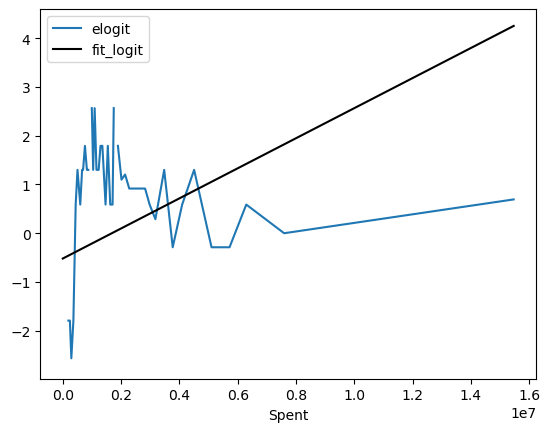

In [158]:
ax = Spent_summary.plot(x = 'Spent', y = 'elogit')
Spent_summary.plot(x = 'Spent', y = 'fit_logit',
                color = 'black',
                ax = ax);

In [159]:
Grand_Table_US_Districts_Summary_Running_Info['Won'].value_counts(normalize = True)

Won
0    0.511243
1    0.488757
Name: proportion, dtype: float64

In [160]:
# Grand_Table_US_Districts_Summary_Running_Info['Spent'].value_counts(normalize = True)

In [161]:
var = 'Incumbent'

pd.crosstab(Grand_Table_US_Districts_Summary_Running_Info[var],
            Grand_Table_US_Districts_Summary_Running_Info['Won'],
            normalize = 'index')

Won,0,1
Incumbent,,
0,0.881607,0.118393
1,0.040323,0.959677


Notice that this returns a bs4 Tag object.

In [188]:
reduced_model = smf.logit('Won ~ Incumbent',
                        data = Grand_Table_US_Districts_Summary_Running_Info).fit()
full_model = smf.logit('Won ~ Incumbent + Spent',
                    data = Grand_Table_US_Districts_Summary_Running_Info).fit()

Optimization terminated successfully.
         Current function value: 0.277978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274450
         Iterations 7


In [189]:
G2 = -2 * (reduced_model.llf - full_model.llf)
G2

5.962271089765352

In [190]:
from scipy.stats import chi2

In [191]:
df = full_model.df_model - reduced_model.df_model
df

1.0

In [192]:
p = chi2.sf(G2, df = df)
p

0.014615203104069613

In [193]:
def dd_test(reduced_model, full_model):
    G2 = -2 * (reduced_model.llf - full_model.llf)
    df = full_model.df_model - reduced_model.df_model
    return chi2.sf(G2, df = df)

In [194]:
dd_test(reduced_model, full_model)

0.014615203104069613

## With normalization & aggregation via Transformation Method

In [195]:
Grand_Table_US_Districts_Summary_Running_Info.groupby('State & District')['Spent'].sum()

State & District
Alabama District 01      1938322
Alabama District 02       725356
Alabama District 03      1259535
Alabama District 04      1323812
Alabama District 05       210045
                          ...   
Wisconsin District 05    1340205
Wisconsin District 06    1982447
Wisconsin District 07    3747430
Wisconsin District 08    3241717
Wyoming District 01      3192402
Name: Spent, Length: 417, dtype: int64

In [196]:
Grand_Table_US_Districts_Summary_Running_Info['Total_District_Spent'] = Grand_Table_US_Districts_Summary_Running_Info.groupby('State & District')['Spent'].transform('sum')
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District,Total_District_Spending,Total_District_Raised,Total_District_Cash_on_Hand,Percent_Total_District_Raised,Percent_Total_Cash_on_Hand,Total_District_Spent,Percent_Total_Spent
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01,1938322,2051416,113095,0.960956,0.990079,1938322,0.959257
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01,1938322,2051416,113095,0.039044,0.009921,1938322,0.040743
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02,725356,706857,-13633,0.920705,1.000000,725356,0.922813
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02,725356,706857,-13633,0.079295,-0.000000,725356,0.077187
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03,1259535,1243384,502277,0.959568,0.999914,1259535,0.967471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07,3747430,3899416,151986,0.323627,0.192564,3747430,0.328943
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08,3241717,3619883,1171527,0.884809,0.998152,3241717,0.876635
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08,3241717,3619883,1171527,0.115191,0.001848,3241717,0.123365
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01,3192402,3138480,155930,0.957114,0.984846,3192402,0.958578


In [197]:
Grand_Table_US_Districts_Summary_Running_Info.groupby('State & District')['Raised'].sum()

State & District
Alabama District 01      2051416
Alabama District 02       706857
Alabama District 03      1243384
Alabama District 04      1255076
Alabama District 05       655365
                          ...   
Wisconsin District 05    1526113
Wisconsin District 06    2103509
Wisconsin District 07    3899416
Wisconsin District 08    3619883
Wyoming District 01      3138480
Name: Raised, Length: 417, dtype: int64

In [198]:
Grand_Table_US_Districts_Summary_Running_Info['Total_District_Raised'] = Grand_Table_US_Districts_Summary_Running_Info.groupby('State & District')['Raised'].transform('sum')
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District,Total_District_Spending,Total_District_Raised,Total_District_Cash_on_Hand,Percent_Total_District_Raised,Percent_Total_Cash_on_Hand,Total_District_Spent,Percent_Total_Spent
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01,1938322,2051416,113095,0.960956,0.990079,1938322,0.959257
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01,1938322,2051416,113095,0.039044,0.009921,1938322,0.040743
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02,725356,706857,-13633,0.920705,1.000000,725356,0.922813
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02,725356,706857,-13633,0.079295,-0.000000,725356,0.077187
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03,1259535,1243384,502277,0.959568,0.999914,1259535,0.967471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07,3747430,3899416,151986,0.323627,0.192564,3747430,0.328943
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08,3241717,3619883,1171527,0.884809,0.998152,3241717,0.876635
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08,3241717,3619883,1171527,0.115191,0.001848,3241717,0.123365
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01,3192402,3138480,155930,0.957114,0.984846,3192402,0.958578


In [199]:
Grand_Table_US_Districts_Summary_Running_Info.groupby('State & District')['Cash on Hand'].sum()

State & District
Alabama District 01       113095
Alabama District 02       -13633
Alabama District 03       502277
Alabama District 04       647004
Alabama District 05      1137501
                          ...   
Wisconsin District 05     187315
Wisconsin District 06     311396
Wisconsin District 07     151986
Wisconsin District 08    1171527
Wyoming District 01       155930
Name: Cash on Hand, Length: 417, dtype: int64

In [200]:
Grand_Table_US_Districts_Summary_Running_Info['Total_District_Cash_on_Hand'] = Grand_Table_US_Districts_Summary_Running_Info.groupby('State & District')['Cash on Hand'].transform('sum')
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District,Total_District_Spending,Total_District_Raised,Total_District_Cash_on_Hand,Percent_Total_District_Raised,Percent_Total_Cash_on_Hand,Total_District_Spent,Percent_Total_Spent
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01,1938322,2051416,113095,0.960956,0.990079,1938322,0.959257
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01,1938322,2051416,113095,0.039044,0.009921,1938322,0.040743
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02,725356,706857,-13633,0.920705,1.000000,725356,0.922813
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02,725356,706857,-13633,0.079295,-0.000000,725356,0.077187
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03,1259535,1243384,502277,0.959568,0.999914,1259535,0.967471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07,3747430,3899416,151986,0.323627,0.192564,3747430,0.328943
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08,3241717,3619883,1171527,0.884809,0.998152,3241717,0.876635
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08,3241717,3619883,1171527,0.115191,0.001848,3241717,0.123365
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01,3192402,3138480,155930,0.957114,0.984846,3192402,0.958578


In [201]:
Grand_Table_US_Districts_Summary_Running_Info['Percent_Total_District_Raised'] = Grand_Table_US_Districts_Summary_Running_Info['Raised']*100 / Grand_Table_US_Districts_Summary_Running_Info['Total_District_Raised']
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District,Total_District_Spending,Total_District_Raised,Total_District_Cash_on_Hand,Percent_Total_District_Raised,Percent_Total_Cash_on_Hand,Total_District_Spent,Percent_Total_Spent
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01,1938322,2051416,113095,0.960956,0.990079,1938322,0.959257
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01,1938322,2051416,113095,0.039044,0.009921,1938322,0.040743
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02,725356,706857,-13633,0.920705,1.000000,725356,0.922813
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02,725356,706857,-13633,0.079295,-0.000000,725356,0.077187
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03,1259535,1243384,502277,0.959568,0.999914,1259535,0.967471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07,3747430,3899416,151986,0.323627,0.192564,3747430,0.328943
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08,3241717,3619883,1171527,0.884809,0.998152,3241717,0.876635
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08,3241717,3619883,1171527,0.115191,0.001848,3241717,0.123365
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01,3192402,3138480,155930,0.957114,0.984846,3192402,0.958578


In [202]:
Grand_Table_US_Districts_Summary_Running_Info['Percent_Total_Cash_on_Hand'] = Grand_Table_US_Districts_Summary_Running_Info['Cash on Hand']*100 / Grand_Table_US_Districts_Summary_Running_Info['Total_District_Cash_on_Hand']
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District,Total_District_Spending,Total_District_Raised,Total_District_Cash_on_Hand,Percent_Total_District_Raised,Percent_Total_Cash_on_Hand,Total_District_Spent,Percent_Total_Spent
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01,1938322,2051416,113095,0.960956,0.990079,1938322,0.959257
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01,1938322,2051416,113095,0.039044,0.009921,1938322,0.040743
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02,725356,706857,-13633,0.920705,1.000000,725356,0.922813
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02,725356,706857,-13633,0.079295,-0.000000,725356,0.077187
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03,1259535,1243384,502277,0.959568,0.999914,1259535,0.967471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07,3747430,3899416,151986,0.323627,0.192564,3747430,0.328943
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08,3241717,3619883,1171527,0.884809,0.998152,3241717,0.876635
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08,3241717,3619883,1171527,0.115191,0.001848,3241717,0.123365
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01,3192402,3138480,155930,0.957114,0.984846,3192402,0.958578


In [203]:
Grand_Table_US_Districts_Summary_Running_Info['Percent_Total_District_Spent'] = Grand_Table_US_Districts_Summary_Running_Info['Spent']*100 / Grand_Table_US_Districts_Summary_Running_Info['Total_District_Spent']
Grand_Table_US_Districts_Summary_Running_Info

,Raised,Spent,Cash on Hand,Incumbent,Won,Candidate_Name,State & District,Total_District_Spending,Total_District_Raised,Total_District_Cash_on_Hand,Percent_Total_District_Raised,Percent_Total_Cash_on_Hand,Total_District_Spent,Percent_Total_Spent,Percent_Total_District_Spent
0,1971321,1859349,111973,0,1,Jerry Carl (R),Alabama District 01,1938322,2051416,113095,0.960956,0.990079,1938322,0.959257,0.959257
1,80095,78973,1122,0,0,James Averhart (D),Alabama District 01,1938322,2051416,113095,0.039044,0.009921,1938322,0.040743,0.040743
2,650807,669368,-13633,0,1,Barry Moore (R),Alabama District 02,725356,706857,-13633,0.920705,1.000000,725356,0.922813,0.922813
3,56050,55988,0,0,0,Phyllis Harvey-Hall (D),Alabama District 02,725356,706857,-13633,0.079295,-0.000000,725356,0.077187,0.077187
4,1193111,1218564,502234,1,1,Mike D Rogers (R),Alabama District 03,1259535,1243384,502277,0.959568,0.999914,1259535,0.967471,0.967471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1261957,1232690,29267,0,0,Tricia Zunker (D),Wisconsin District 07,3747430,3899416,151986,0.323627,0.192564,3747430,0.328943,0.328943
841,3202905,2841801,1169362,1,1,Mike Gallagher (R),Wisconsin District 08,3241717,3619883,1171527,0.884809,0.998152,3241717,0.876635,0.876635
842,416978,399916,2165,0,0,Amanda Stuck (D),Wisconsin District 08,3241717,3619883,1171527,0.115191,0.001848,3241717,0.123365,0.123365
843,3003883,3060167,153567,1,1,Liz Cheney (R),Wyoming District 01,3192402,3138480,155930,0.957114,0.984846,3192402,0.958578,0.958578


In [205]:
reduced_model_2 = smf.logit('Won ~ Incumbent',
                        data = Grand_Table_US_Districts_Summary_Running_Info).fit()
full_model_2 = smf.logit('Won ~ Incumbent + Percent_Total_District_Spent',
                    data = Grand_Table_US_Districts_Summary_Running_Info).fit()

Optimization terminated successfully.
         Current function value: 0.277978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180601
         Iterations 8


In [211]:
G2_2nd = -2 * (reduced_model_2.llf - full_model_2.llf)
G2_2nd

164.5667875986689

In [212]:
from scipy.stats import chi2


In [213]:
df_2 = full_model_2.df_model - reduced_model_2.df_model
df_2

1.0

In [214]:
p_2nd = chi2.sf(G2_2nd, df = df_2)
p_2nd

1.1374832437803577e-37

In [215]:
def dd_test(reduced_model, full_model):
    G2 = -2 * (reduced_model.llf - full_model.llf)
    df = full_model.df_model - reduced_model.df_model
    return chi2.sf(G2, df = df)

In [216]:
dd_test(reduced_model_2, full_model_2)

1.1374832437803577e-37

In [217]:
full_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Won   No. Observations:                  845
Model:                          Logit   Df Residuals:                      842
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.7394
Time:                        21:48:24   Log-Likelihood:                -152.61
converged:                       True   LL-Null:                       -585.50
Covariance Type:            nonrobust   LLR p-value:                9.984e-189
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.4272      0.348    -12.715      0.000      -5.110      -3.745
Incumbent                        3.2136      0.343      9.374      0.000       2.542       3.886
Percent_Total_District_Spent     6.2478      0.604     10.348      0.000       5.064       7.431
================================================================================================
"""

In [219]:
reduced_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Won   No. Observations:                  845
Model:                          Logit   Df Residuals:                      843
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.5988
Time:                        21:48:49   Log-Likelihood:                -234.89
converged:                       True   LL-Null:                       -585.50
Covariance Type:            nonrobust   LLR p-value:                1.633e-154
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0077      0.142    -14.107      0.000      -2.287      -1.729
Incumbent      5.1774      0.300     17.285      0.000       4.590       5.765
==============================================================================
"""

In [220]:
## run prediction model 

## Next: f{} string URL to loop through District #s

c. Finally, extract the companies, locations, and posting dates for each job. For example, the first job has a company of "Payne, Roberts and Davis", a location of "Stewartbury, AA", and a posting date of "2021-04-08". Ensure that the text that you extract is clean, meaning no extra spaces or other characters at the beginning or end.  


d. Take the lists that you have created and combine them into a pandas DataFrame. 

In [ ]:
list2

In [ ]:
list3

In [ ]:
list4

2. Next, add a column that contains the url for the "Apply" button. Try this in two ways.   
    a. First, use the BeautifulSoup find_all method to extract the urls.  

3. Finally, we want to get the job description text for each job.  
    a. Start by looking at the page for the first job, https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html. Using BeautifulSoup, extract the job description paragraph.  

In [ ]:
# applylinks = [s for s in URLs if s != 'https://www.realpython.com']
# applylinks

    b. We want to be able to do this for all pages. Write a function which takes as input a url and returns the description text on that page. For example, if you input "https://realpython.github.io/fake-jobs/jobs/television-floor-manager-8.html" into your function, it should return the string "At be than always different American address. Former claim chance prevent why measure too. Almost before some military outside baby interview. Face top individual win suddenly. Parent do ten after those scientist. Medical effort assume teacher wall. Significant his himself clearly very. Expert stop area along individual. Three own bank recognize special good along.".  


    c. Use the [.apply method](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) on the url column you created above to retrieve the description text for all of the jobs.

The `.find` method find the first matching tag. 

We can find _all_ elements with a particular tag using the `.findAll(<tag>)` method. Say we want to find all images. We'll look for the `img` tag.

Let's look closer at the first image.

You can access attributes of a Tag object in the same way that you would access values from a dictionary.

You can also safely access attributes using `.get`. This might be useful if, for example, you aren't sure if a particular Tag or all tags had a certain attribute.

You can also specify a default value when using `get`.

If you want to grab a particular attribute for all images, an easy way to do so is with a list comprehension.

We can further navigate the html tree to extract out other bits of information.

When scraping from a web page, you should make use of "View Page Source" and/or "Inspect Element" in your web browswer.

For example, let's say we want to look at the second header on the page.

Similar to using `find` and `findall` in the full soup, we can use the `.find` method just within a Tag.

Now, let's look for the table containing the Turing Award winners.

Using `.findAll` reveals that there are multiple tables on the page.

If we know a bit more about what we are looking for, we can include an `attrs` argument and pass a dictionary. 

Go to the Turing award page in your browser, right click on the top of the table and choose "Inspect". You will notice that this table is defined with tag `<table class="wikitable">.` Armed with this information, we can narrow down our search.

We can display the table by importing the `HTML` function.

However, this does not give us a way to work with the data in the table, only to display it.

If we want to interact with the table, we can use the _pandas_ `read_html` method.